<a href="https://colab.research.google.com/github/haikalef/Final_Project_Sanbercode_Bootcamp_2021/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans


data = pd.read_csv('Data_Negara_HELP.csv')
data

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [ ]:
data[['Kesehatan', 'Pendapatan', 'GDPperkapita']]

,Kesehatan,Pendapatan,GDPperkapita
0,7.58,1610,553
1,6.55,9930,4090
2,4.17,12900,4460
3,2.85,5900,3530
4,6.03,19100,12200
...,...,...,...
162,5.25,2950,2970
163,4.91,16500,13500
164,6.84,4490,1310
165,5.18,4480,1310


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


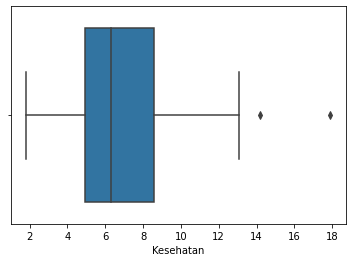

In [ ]:
sns.boxplot(data['Kesehatan'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


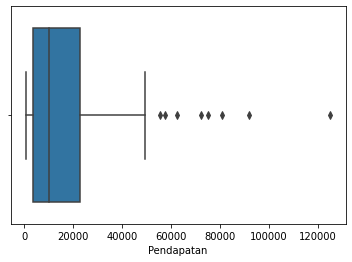

In [ ]:
sns.boxplot(data['Pendapatan'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


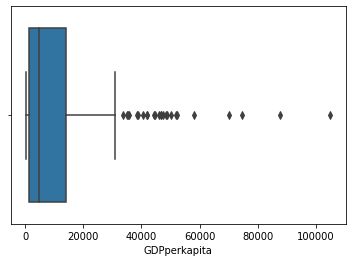

In [ ]:
sns.boxplot(data['GDPperkapita'])

In [ ]:
#drop negara karena negara adalah data dependent
data_baru = data.drop(['Negara'], axis=1)

clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(data_baru)
  clusters.append(km.inertia_)

print('cluster :')
clusters

cluster :


[117459687469.07819,
 36528387934.3221,
 21710210039.75414,
 14610713446.535133,
 10655378083.862543,
 7655725089.094505,
 5353767457.732321,
 4258897193.7515826,
 3228565265.69808,
 2662664687.013527]

Text(0, 0.5, 'Inertia')

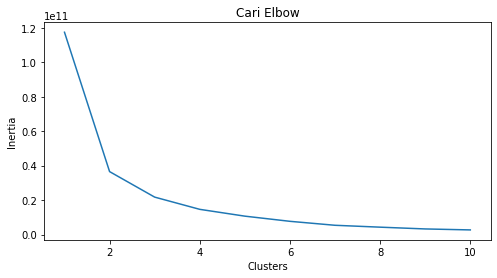

In [ ]:
# membuat plot inertia
# mencari elbow untuk menentukan n_cluster
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#ambil cluster = 3

In [ ]:
#scalling data
sc = RobustScaler()
data_sc = sc.fit_transform(data_baru)

#clustering with kmeans
km1 = KMeans(n_clusters=3).fit(data_sc)
data_sc = pd.DataFrame(sc.inverse_transform(data_sc), columns=data_baru.columns)
data_sc['Labels'] = km1.labels_



In [ ]:
data_sc

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Labels
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,0
163,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,2
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

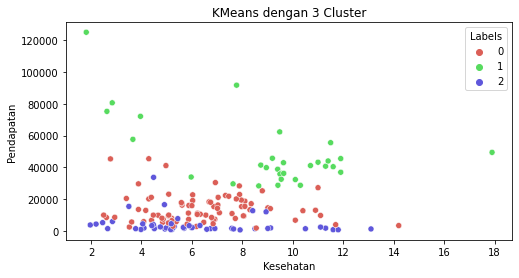

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data_sc['Kesehatan'],
    data_sc['Pendapatan'],
    hue=data_sc['Labels'],
    palette=sns.color_palette('hls', 3)
)
plt.title('KMeans dengan 3 Cluster')
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

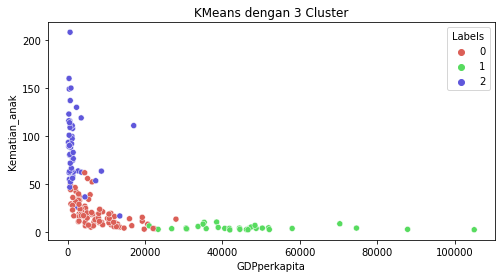

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data_sc['GDPperkapita'],
    data_sc['Kematian_anak'],
    hue=data_sc['Labels'],
    palette=sns.color_palette('hls', 3)
)
plt.title('KMeans dengan 3 Cluster')
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

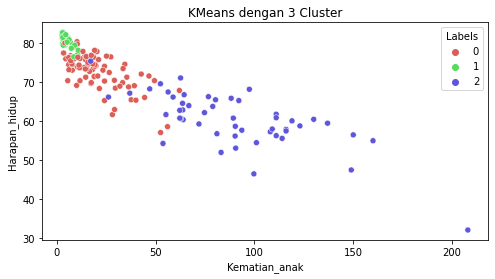

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data_sc['Kematian_anak'],
    data_sc['Harapan_hidup'],
    hue=data_sc['Labels'],
    palette=sns.color_palette('hls', 3)
)
plt.title('KMeans dengan 3 Cluster')
plt.show

In [ ]:
data[data_sc['Kesehatan']<4].where(data_sc['Pendapatan']<20000).dropna()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
3,Angola,119.0,62.300,2.85,42.9000,5900.0,22.40,60.1,6.16,3530.0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0
31,Central African Republic,149.0,11.800,3.98,26.5000,888.0,2.01,47.5,5.21,446.0
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190.0,20.70,60.4,4.95,2740.0
50,Eritrea,55.2,4.790,2.66,23.3000,1420.0,11.60,61.7,4.61,482.0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0
70,Indonesia,33.3,24.300,2.61,22.4000,8430.0,15.30,69.9,2.48,3110.0
93,Madagascar,62.2,25.000,3.77,43.0000,1390.0,8.79,60.8,4.60,413.0
107,Myanmar,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0
116,Pakistan,92.1,13.500,2.20,19.4000,4280.0,10.90,65.3,3.85,1040.0


In [ ]:
data[data_sc['GDPperkapita']<20000].where(data_sc['Kematian_anak']>100).dropna()


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0
17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0
28,Cameroon,108.0,22.2,5.13,27.0,2660.0,1.910,57.3,5.11,1310.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.21,446.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.59,897.0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.800,57.5,6.54,334.0
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690.0,5.390,56.3,5.27,1220.0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700.0,24.900,60.9,5.21,17100.0
63,Guinea,109.0,30.3,4.93,43.2,1190.0,16.100,58.0,5.34,648.0


In [ ]:
data[data_sc['Kematian_anak']>100].where(data_sc['Harapan_hidup']<50).dropna()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0


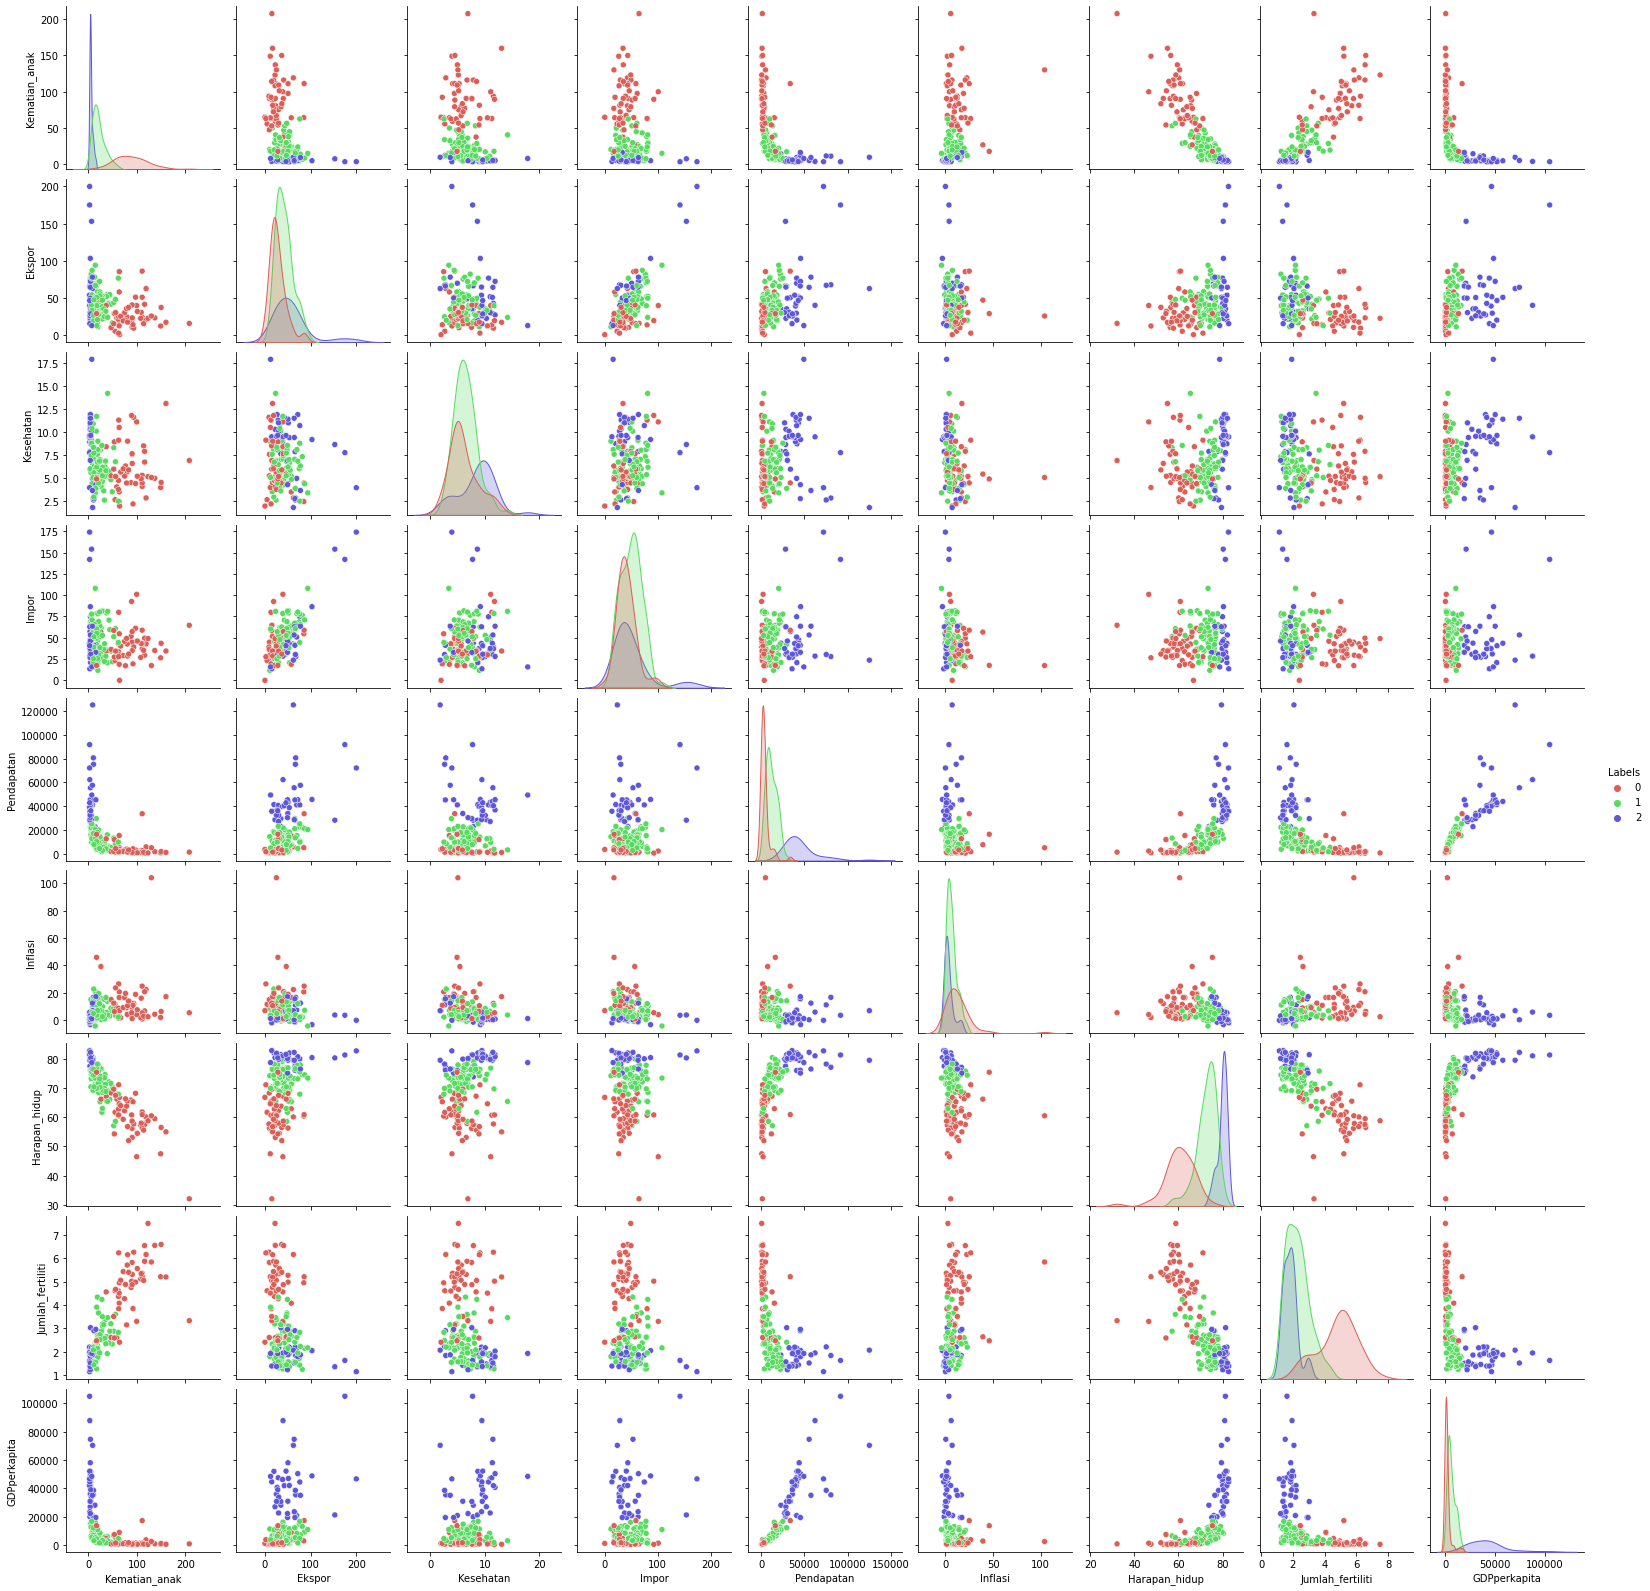

In [ ]:
sns.pairplot(data_sc, hue='Labels', palette=sns.color_palette('hls', 3))